# 한글 및 데이터 경로 설정

In [1]:
!apt-get update -qq
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped dire

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설치 후 적용
plt.rc('font', family='NanumGothic')

# 한글 폰트 리스트 확인 (필요할 경우)
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
[font for font in font_list if 'Nanum' in font]


['/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf']

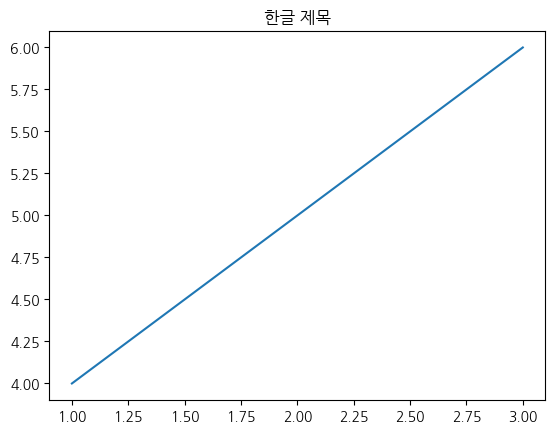

In [3]:
plt.title('한글 제목')
plt.plot([1, 2, 3], [4, 5, 6])
plt.show()

In [4]:
# 코랩, 로컬에 따라 데이터 경로 변경
# colab
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  from google.colab import drive
  drive.mount('/content/drive')
  data_path = "/content/drive/MyDrive/climateIdea/"
  print("Colab")
else:
  data_path = "./"
  print("Local")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Colab


# LCA row data 분석


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
LCA_data = pd.read_csv(data_path+'한국환경산업기술원_환경성적표지 유효 인증현황_20240719.csv', encoding='euc-kr')
water_data = pd.read_csv(data_path + "water_dataset.csv")

In [7]:
LCA_data.head()

,연번,기업명,영향범주,인증번호,제품군,인증제품명,자원발자국-총량,자원발자국-단위,자원발자국-제조전,자원발자국-제조,...,광화학 스모그-사용,광화학 스모그-폐기,물발자국-총량,물발자국-단위,물발자국-제조전,물발자국-제조,물발자국-사용,물발자국-폐기,시작,종료
0,5,산수음료(주),환경성적,2021-233,비내구재,i'm eco 산수 [0.5L],0.09240,kgSbe/개,0.09230,0.000097,...,NaN,1.100000e-06,0.03960,m3H2Oe/개,0.039400,0.000237,NaN,0.000003,2021-07-30,2024-07-29
1,6,산수음료(주),환경성적,2021-236,비내구재,i'm eco 산수 [0.33L],0.06540,kgSbe/개,0.06530,0.000085,...,NaN,8.650000e-07,0.02800,m3H2Oe/개,0.027800,0.000202,NaN,0.000002,2021-07-30,2024-07-29
2,669,제주특별자치도개발공사,저탄소제품,2022-471,비내구재,제주 삼다수 [500mL],0.00310,kgSbe/개,0.00294,0.000146,...,NaN,1.710000e-06,0.00175,m3H2Oe/개,0.000861,0.000882,NaN,0.000003,2022-07-29,2025-07-28
3,670,제주특별자치도개발공사,환경성적,2019-139,비내구재,제주 삼다수 [2.0L],0.00877,kgSbe/개,0.00811,0.000608,...,NaN,5.800000e-06,0.00779,m3H2Oe/개,0.005690,0.002080,NaN,0.000009,2022-07-29,2025-07-28
4,1,고려기초소재(주),환경성적,2018-073,생산재,콘크리트혼화재(고로슬래그미분말),0.39800,kgSbe/ton,0.14600,0.252000,...,NaN,NaN,0.42700,m3H2Oe/ton,0.179000,0.248000,NaN,NaN,2021-07-26,2024-07-25


In [8]:
LCA_data= LCA_data[['인증제품명', '자원발자국-총량', '탄소발자국-총량', '물발자국-총량']]
LCA_data.head()

,인증제품명,자원발자국-총량,탄소발자국-총량,물발자국-총량
0,i'm eco 산수 [0.5L],0.09240,0.1040,0.03960
1,i'm eco 산수 [0.33L],0.06540,0.0758,0.02800
2,제주 삼다수 [500mL],0.00310,0.1010,0.00175
3,제주 삼다수 [2.0L],0.00877,0.3100,0.00779
4,콘크리트혼화재(고로슬래그미분말),0.39800,62.3000,0.42700


# Water dataset 데이터 처리
- LCA의 물 제품 정보만 모은 water_dataset.csv을 엑셀에서 작업완료

In [11]:
# Define the columns of interest
columns_of_interest = ['자원발자국-총량(kgSbe/개)', '물발자국-총량(m3H2Oe/개)', '탄소발자국-총량(m3H2Oe/개)']
data_for_analysis = water_data[columns_of_interest]

## Z-score로 이상치 탐지

In [15]:
# Calculate Z-scores for outlier detection
z_scores = stats.zscore(data_for_analysis)
outliers = (abs(z_scores) > 3) # Z 절대값이 3이상이면 outleir
z_scores.head()

,자원발자국-총량(kgSbe/개),물발자국-총량(m3H2Oe/개),탄소발자국-총량(m3H2Oe/개)
0,-0.343696,-0.611631,-0.616982
1,1.700643,1.250087,-0.648254
2,2.577346,2.069666,-0.506018
3,2.619557,2.274561,-0.455580
4,4.999641,4.613189,-0.072250


In [16]:
outliers.head()

,자원발자국-총량(kgSbe/개),물발자국-총량(m3H2Oe/개),탄소발자국-총량(m3H2Oe/개)
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,True,True,False


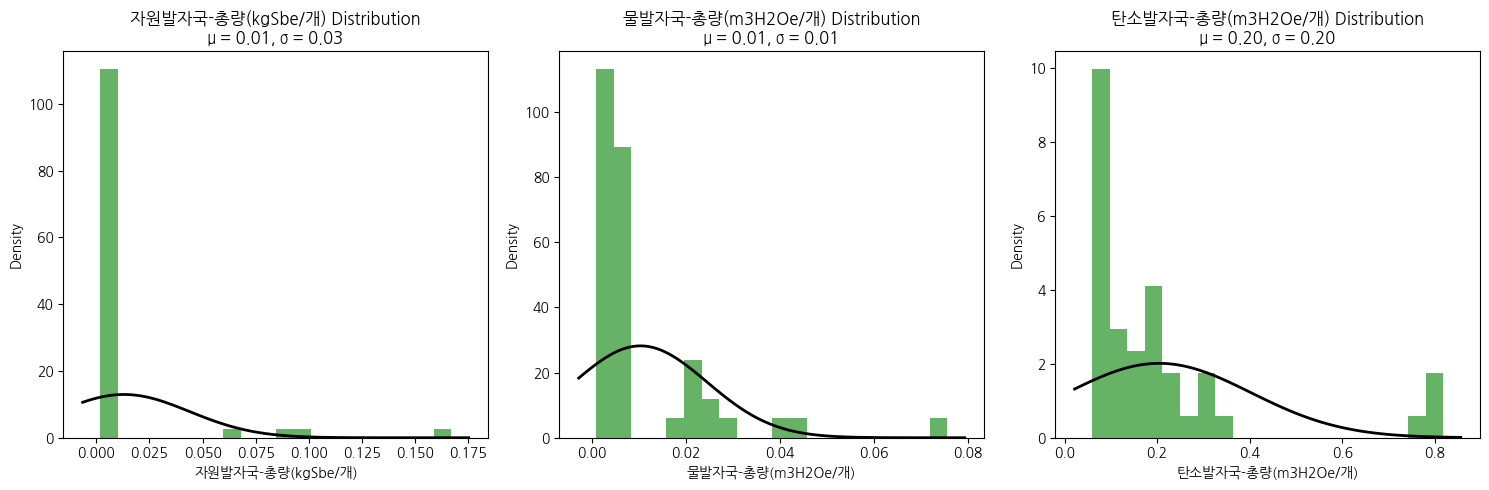

In [21]:
# Z-score, 정규분포로 시각화
import scipy.stats as stats

# Re-run the visualization code with the corrected import
plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_of_interest):
    plt.subplot(1, 3, i + 1)
    # 각 발자국 값 막대그래프로 피팅
    plt.hist(data_for_analysis[column], bins=20, density=True, alpha=0.6, color='g')

    # Fit a normal distribution and overlay it -> 정규분포에 피팅
    mu, std = stats.norm.fit(data_for_analysis[column])
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = f'{column} Distribution\nμ = {mu:.2f}, σ = {std:.2f}'
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [30]:
# outlier 컬럼 구하기
# Show outlier details
# Step 1: Identify rows with any outliers
z_score_outlier_idx= outliers.any(axis=1)

# Step 2: Extract those rows from the original dataframe
outlier_data = water_data[z_score_outlier_idx]

# Display the outlier data
outlier_data[['인증제품명'] + columns_of_interest]

,인증제품명,자원발자국-총량(kgSbe/개),물발자국-총량(m3H2Oe/개),탄소발자국-총량(m3H2Oe/개)
4,i'm eco 산수 [2.0L],0.16700,0.0756,0.190
26,스파클 먹는샘물 [15.4L],0.00424,0.0204,0.818
27,스파클 먹는샘물 [18.9L],0.00410,0.0235,0.808


## Isolation Forest로 이상치 탐지

In [23]:
from sklearn.ensemble import IsolationForest

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_pred = iso_forest.fit_predict(data_for_analysis)

# Outlier labels: -1 for outliers, 1 for inliers
outliers_iso = outlier_pred == -1

# Extract the outliers using the Isolation Forest results
iso_outlier_data = water_data[outliers_iso]

# Show the outliers detected by Isolation Forest
iso_outlier_data[['인증제품명'] + columns_of_interest]

,인증제품명,자원발자국-총량(kgSbe/개),물발자국-총량(m3H2Oe/개),탄소발자국-총량(m3H2Oe/개)
1,i'm eco 산수 [0.33L],0.0654,0.0280,0.0758
3,i'm eco 산수 [1.0L],0.0937,0.0425,0.1140
4,i'm eco 산수 [2.0L],0.1670,0.0756,0.1900


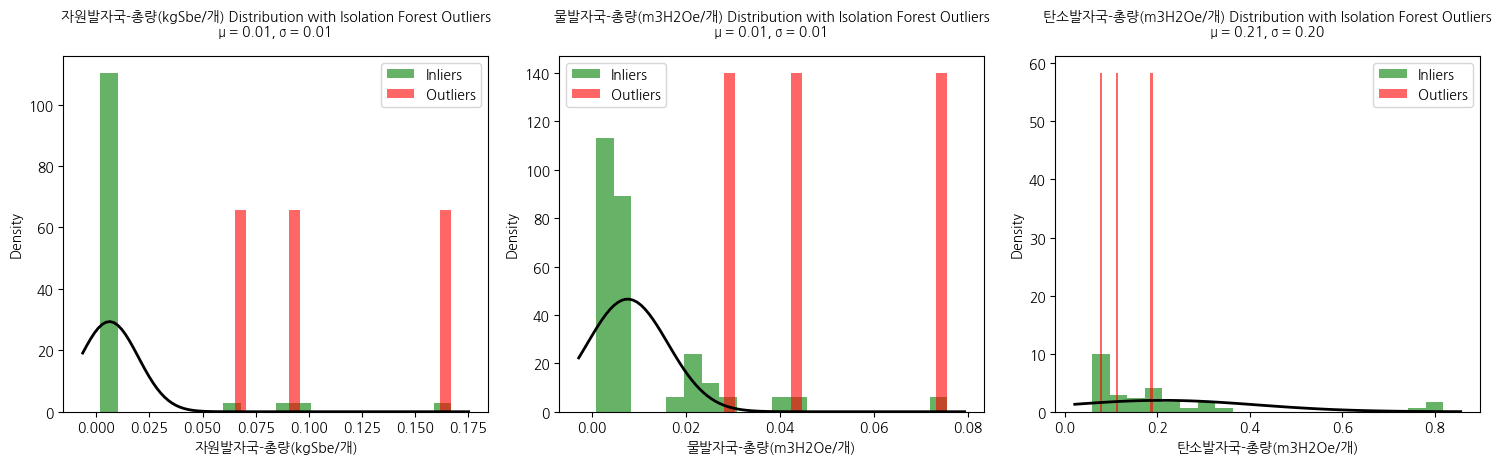

In [25]:
# Z-score 분포와, isolation forest로 구한 outlier을 plotting
plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_of_interest):
    plt.subplot(1, 3, i + 1)
    plt.hist(data_for_analysis[column], bins=20, density=True, alpha=0.6, color='g', label='Inliers')

    # Highlight the outliers in red
    plt.hist(iso_outlier_data[column], bins=20, density=True, alpha=0.6, color='r', label='Outliers')

    # Fit a normal distribution to the inliers
    mu, std = stats.norm.fit(data_for_analysis[~outliers_iso][column])
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    # Set title and labels with adjusted title location
    title = f'{column} Distribution with Isolation Forest Outliers\nμ = {mu:.2f}, σ = {std:.2f}'
    plt.title(title, fontsize=10, pad=15)
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to prevent overlap
plt.show()



In [38]:
# Z-score와 Isolation Forest로 검사했을 때, 공통으로 탐지된 이상치 제거
# Identify the outliers detected by both Z-score and Isolation Forest

common_outliers = z_score_outlier_idx& outliers_iso

# Display common outleir
water_data[common_outliers]

<ipython-input-38-860059764b56>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  water_data[common_outliers]


,인증제품명,자원발자국-총량(kgSbe/개),탄소발자국-총량(m3H2Oe/개),물발자국-총량(m3H2Oe/개),자원발자국-총량(kgSbe/L),탄소발자국-총량(m3H2Oe/L),물발자국-총량(m3H2Oe/L)


In [42]:
# 아웃라이어 제거
water_data = water_data[~common_outliers]
water_data

<ipython-input-42-970f18249740>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  water_data = water_data[~common_outliers]


,인증제품명,자원발자국-총량(kgSbe/개),탄소발자국-총량(m3H2Oe/개),물발자국-총량(m3H2Oe/개),자원발자국-총량(kgSbe/L),탄소발자국-총량(m3H2Oe/L),물발자국-총량(m3H2Oe/L)
0,EVERYDAY 산수 [0.33L],0.00244,0.0820,0.001650,0.007394,0.248485,0.005000
1,i'm eco 산수 [0.33L],0.06540,0.0758,0.028000,0.198182,0.229697,0.084848
2,i'm eco 산수 [0.5L],0.09240,0.1040,0.039600,0.184800,0.208000,0.079200
3,i'm eco 산수 [1.0L],0.09370,0.1140,0.042500,0.093700,0.114000,0.042500
5,"강원 평창수 [0.5L, PET]",0.00231,0.0834,0.001760,0.004620,0.166800,0.003520
6,"강원 평창수 [2.0L, PET]",0.00635,0.2240,0.005230,0.003175,0.112000,0.002615
7,몽베스트[0.33L],0.00223,0.0676,0.001450,0.006758,0.204848,0.004394
8,몽베스트[0.5L],0.00228,0.0757,0.001330,0.004560,0.151400,0.002660
9,몽베스트[1L],0.00579,0.1660,0.003900,0.005790,0.166000,0.003900
10,몽베스트[2L],0.00600,0.2000,0.005520,0.003000,0.100000,0.002760


In [45]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=water_data)

https://docs.google.com/spreadsheets/d/1d_duQpvpwfUcfN9oY2Xg9SOGRr6uAQ9r3MfN2ARonP4#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


## 데이터 누락 처리 - 평균

```
# 코드로 형식 지정됨
```



In [43]:
# 크롤링으로 물 데이터 목록을 가져옴 -
crawled_list = ['탐사수 무라벨, 2L, 12개', '탐사수 무라벨, 500ml, 40개', '제주삼다수 그린 무라벨, 2L, 12개',
                    '제주 삼다수, 2L, 12개', '스파클 생수 무라벨, 2L, 24개', '탐사수 무라벨, 2L, 36개',
                    '탐사수 무라벨, 2L, 24개', '탐사 샘물, 2L, 12개', '탐사수 무라벨, 500ml, 60개',
                    '한국청정음로(주) 몽베스트 생수 물 330ml 500ml 1L 2L, 300ml x 20개, 20개', '스파클 생수 무라벨, 500ml, 60개', '풀무원샘물바이네이쳐 무라벨 생수, 2L, 12개']

In [44]:
# 크롤링 데이터에서 LCA에 없는 제품 목록
missing_products = ['탐사수 무라벨, 2L', '탐사수 무라벨, 500ml', '탐사 샘물 2L']

In [49]:
# Step 1: Calculate the mean values for each relevant column
mean_values = water_data.iloc[:,1:].mean()

# Display the mean values for reference
mean_values

,0
자원발자국-총량(kgSbe/개),0.009525
탄소발자국-총량(m3H2Oe/개),0.204650
물발자국-총량(m3H2Oe/개),0.008823
자원발자국-총량(kgSbe/L),0.014782
탄소발자국-총량(m3H2Oe/L),0.154633
물발자국-총량(m3H2Oe/L),0.010199


## 데이터 누락 처리 - GAN

In [51]:
# Re-import necessary libraries and reset any device settings
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler

# Prepare the numeric data by selecting all except the '인증제품명' column
training_data = water_data
numeric_data = training_data.drop(columns=['인증제품명'])

# 데이터 스케일링 - [0:1]범위
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Convert scaled data to tensor
data_tensor = torch.tensor(scaled_data, dtype=torch.float32)
dataset = TensorDataset(data_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [52]:
# GAN 모델, optimizer정의
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),  # Reduced number of neurons
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim),
            nn.Sigmoid()  # Output scaled to [0, 1]
        )

    def forward(self, x):
        return self.model(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.LeakyReLU(0.2),
            nn.Linear(64, 32),
            nn.LeakyReLU(0.2),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Define input dimensions
latent_dim = 10  # Dimension of random noise input for the Generator
data_dim = scaled_data.shape[1]  # The number of features

# Initialize models and move them to CPU
generator = Generator(input_dim=latent_dim, output_dim=data_dim)
discriminator = Discriminator(input_dim=data_dim)

# Loss function and optimizers
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0002)



In [55]:
# 모델 학습
# Reduced number of epochs for demonstration
epochs = 500
for epoch in range(epochs):
    for real_data in dataloader:
        real_data = real_data[0]

        # Train Discriminator with real data
        optimizer_d.zero_grad()
        real_labels = torch.ones(real_data.size(0), 1)
        real_output = discriminator(real_data)
        real_loss = criterion(real_output, real_labels)

        # Train Discriminator with fake data
        noise = torch.randn(real_data.size(0), latent_dim)
        fake_data = generator(noise)
        fake_labels = torch.zeros(real_data.size(0), 1)
        fake_output = discriminator(fake_data.detach())
        fake_loss = criterion(fake_output, fake_labels)

        # Total Discriminator Loss
        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_d.step()

        # Train Generator
        optimizer_g.zero_grad()
        fake_output = discriminator(fake_data)
        g_loss = criterion(fake_output, real_labels)
        g_loss.backward()
        optimizer_g.step()

    # Print losses occasionally
    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}')

Epoch [0/500], d_loss: 1.3877, g_loss: 0.7327
Epoch [100/500], d_loss: 1.4613, g_loss: 0.5855
Epoch [200/500], d_loss: 1.3008, g_loss: 0.8711
Epoch [300/500], d_loss: 1.3123, g_loss: 0.6967
Epoch [400/500], d_loss: 1.5176, g_loss: 0.5972


In [57]:

# Generate synthetic data
num_samples = len(missing_products)
noise = torch.randn(num_samples, latent_dim)
synthetic_data = generator(noise).detach().cpu().numpy()

# Inverse scale the generated data back to original range
synthetic_data_rescaled = scaler.inverse_transform(synthetic_data)

# Convert the generated data into a DataFrame
generated_df = pd.DataFrame(synthetic_data_rescaled, columns=numeric_data.columns)
generated_df.insert(0, '인증제품명', missing_products)

# Show the generated DataFrame
generated_df

,인증제품명,자원발자국-총량(kgSbe/개),탄소발자국-총량(m3H2Oe/개),물발자국-총량(m3H2Oe/개),자원발자국-총량(kgSbe/L),탄소발자국-총량(m3H2Oe/L),물발자국-총량(m3H2Oe/L)
0,"탐사수 무라벨, 2L",0.004177,0.505665,0.001030,0.000881,0.310869,0.000622
1,"탐사수 무라벨, 500ml",0.004340,0.516845,0.001022,0.000920,0.310827,0.000639
2,탐사 샘물 2L,0.004100,0.535107,0.000999,0.000663,0.311922,0.000619


## 데이터 누락 처리 - (평균값+GAN)/2

In [60]:
print(mean_values)
print(generated_df)

자원발자국-총량(kgSbe/개)     0.009525
탄소발자국-총량(m3H2Oe/개)    0.204650
물발자국-총량(m3H2Oe/개)     0.008823
자원발자국-총량(kgSbe/L)     0.014782
탄소발자국-총량(m3H2Oe/L)    0.154633
물발자국-총량(m3H2Oe/L)     0.010199
dtype: float64
            인증제품명  자원발자국-총량(kgSbe/개)  탄소발자국-총량(m3H2Oe/개)  물발자국-총량(m3H2Oe/개)  \
0     탐사수 무라벨, 2L           0.004177            0.505665           0.001030   
1  탐사수 무라벨, 500ml           0.004340            0.516845           0.001022   
2        탐사 샘물 2L           0.004100            0.535107           0.000999   

   자원발자국-총량(kgSbe/L)  탄소발자국-총량(m3H2Oe/L)  물발자국-총량(m3H2Oe/L)  
0           0.000881            0.310869           0.000622  
1           0.000920            0.310827           0.000639  
2           0.000663            0.311922           0.000619  


In [63]:
# Calculate the combined values (mean + generated data) / 2 for each product
combined_values = (mean_values + generated_df.drop(columns=['인증제품명'])).div(2)

# Update the generated DataFrame with the combined values
missing_products_df = generated_df.copy()
missing_products_df[mean_values.index] = combined_values.values

# Concatenate this with the original water_data
final_dataset = pd.concat([water_data, missing_products_df], ignore_index=True)

In [64]:
# 뒤에 3개의 데이터가 만든 데이터 셋 이다.
final_dataset.tail()

,인증제품명,자원발자국-총량(kgSbe/개),탄소발자국-총량(m3H2Oe/개),물발자국-총량(m3H2Oe/개),자원발자국-총량(kgSbe/L),탄소발자국-총량(m3H2Oe/L),물발자국-총량(m3H2Oe/L)
42,"휘오 순수 [0.5L, PET]",0.002320,0.082600,0.002180,0.004640,0.165200,0.004360
43,"휘오 순수[2.0L, PET]",0.006400,0.236000,0.006070,0.003200,0.118000,0.003035
44,"탐사수 무라벨, 2L",0.006851,0.355157,0.004926,0.007831,0.232751,0.005411
45,"탐사수 무라벨, 500ml",0.006933,0.360748,0.004922,0.007851,0.232730,0.005419
46,탐사 샘물 2L,0.006813,0.369878,0.004911,0.007722,0.233277,0.005409


In [69]:
sheet = sheets.InteractiveSheet(df=final_dataset)

https://docs.google.com/spreadsheets/d/1Hegq-WZMw088NGxenv-Kr3890HfbtJZjFLZr4K3OIB8#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


# Water dataset 분석

- 같은 제품인데(같은 삼다수인데) 용량이 클수록 탄소발자국, 자원발자국이 큰 모습을 보임. -> 이러면 같은 제품에서 용량이 작은 제품이 유리함.
- 그러나, 단위를 통일하여 (1L당 배출량) 으로 계산 후 그래프를 본 결과, 용량이 작을수록 발자국이 큰 모습을 보였음. -> 이러면 위와 반대로 같은 제품에서 용량이 큰 제품이 유리함.
## 그래서 어떻게 발자국을 구했냐
- 같은 제품인데 용량이 다른 것들을 같은 발자국으로 갖게끔 설정했음. kind_of_water_dataset.csv에 저장함.
- 설정한 방법은 각 평균값으로 구했음
- ex 삼다수 탄소 발자국 = (삼다수 1L 탄소 발자국 + 삼다수 2L 탄소발자국 + 삼다수 500ml 탄소발자국)/3

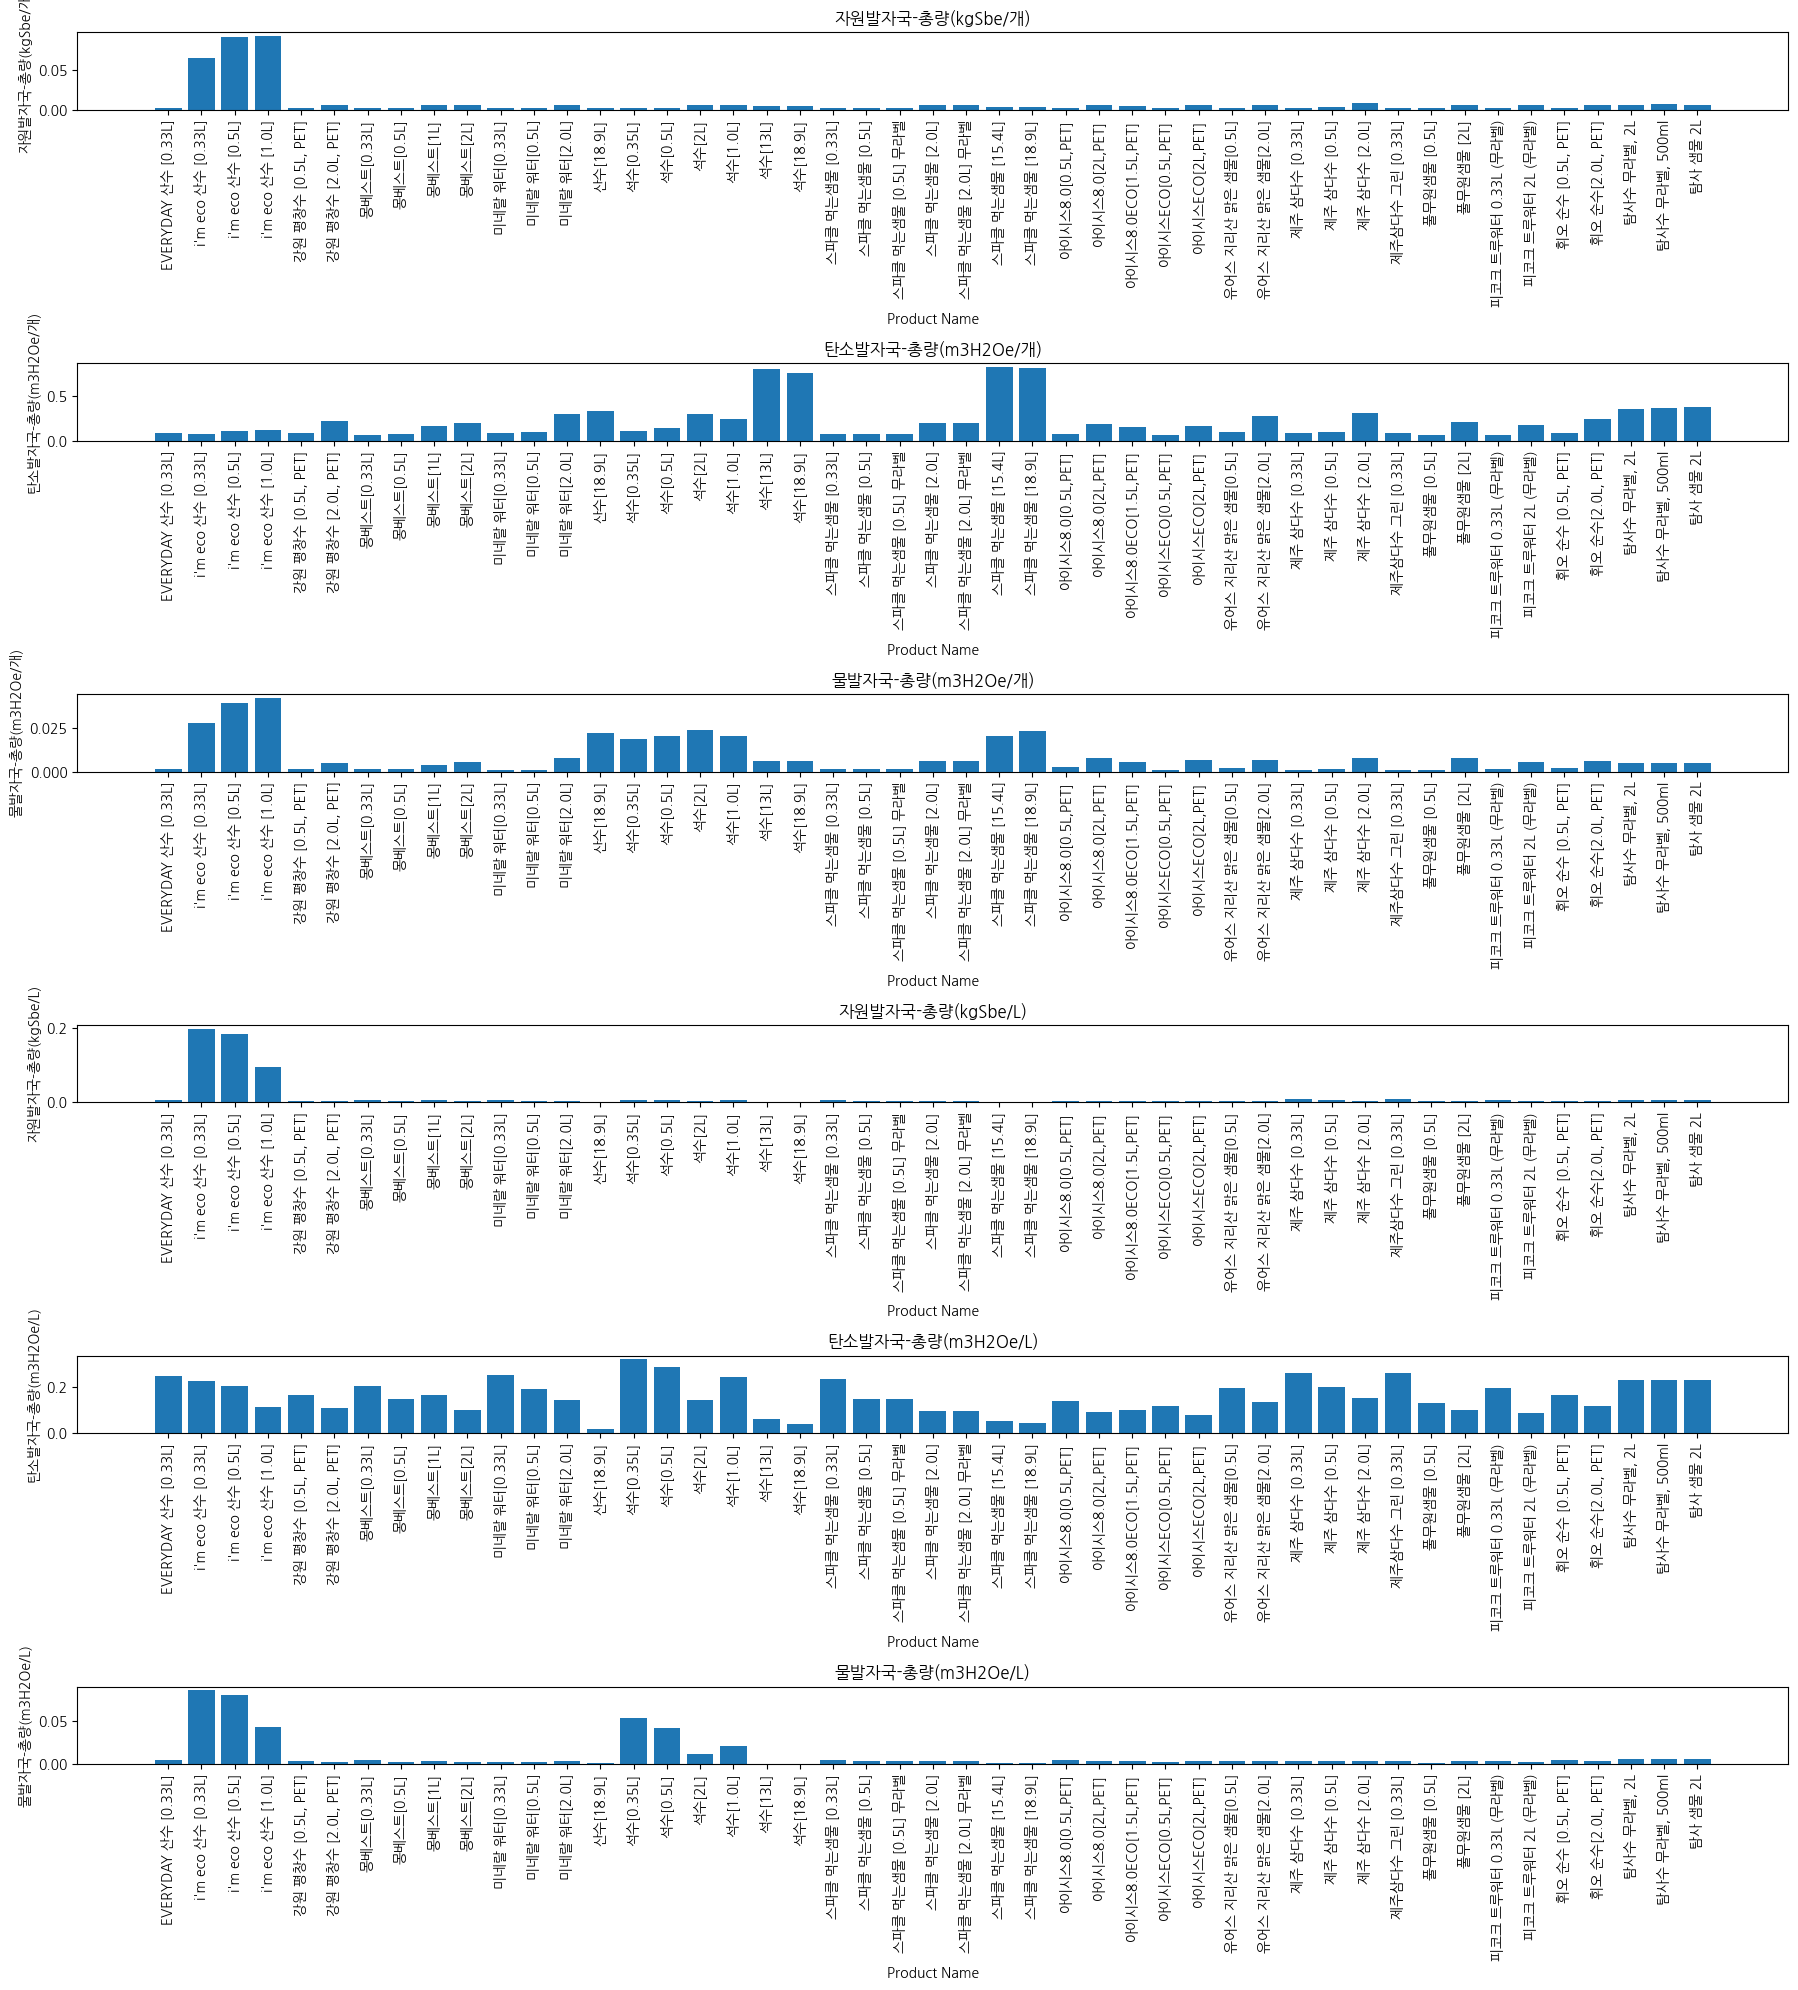

In [66]:
# Define the list of columns to plot
columns_to_plot = [
    '자원발자국-총량(kgSbe/개)', '탄소발자국-총량(m3H2Oe/개)', '물발자국-총량(m3H2Oe/개)',
    '자원발자국-총량(kgSbe/L)', '탄소발자국-총량(m3H2Oe/L)', '물발자국-총량(m3H2Oe/L)'
]

# Plotting
plt.figure(figsize=(18, 20))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)
    plt.bar(final_dataset['인증제품명'], final_dataset[column])
    plt.title(f'{column}')
    plt.xlabel('Product Name')
    plt.ylabel(column)
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()


##엑셀로 그린 그래프
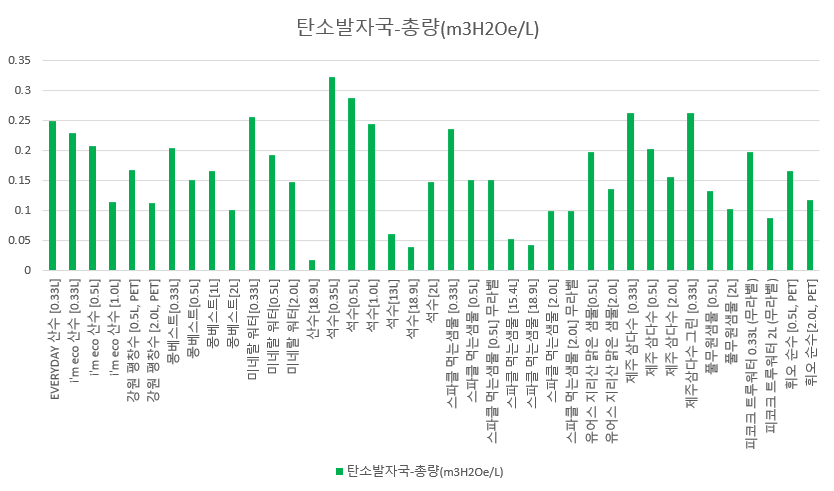

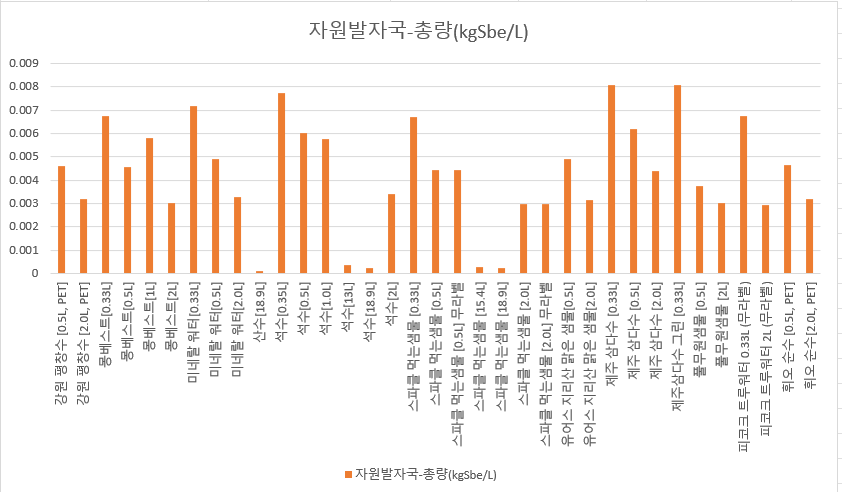

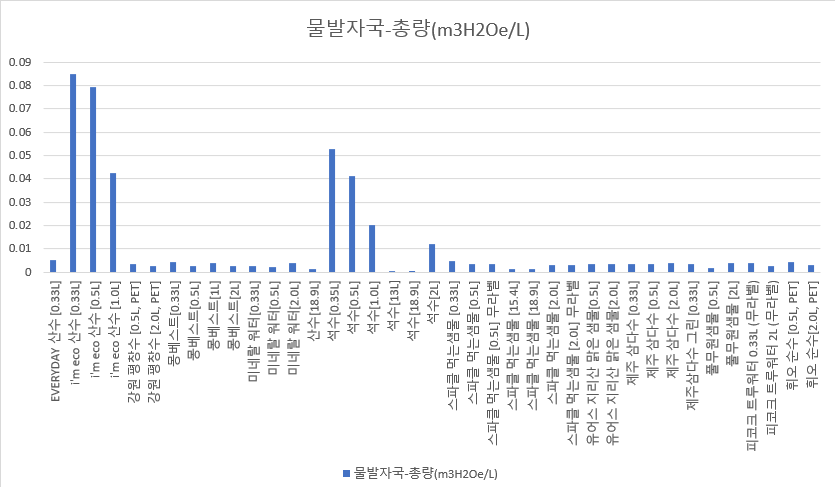

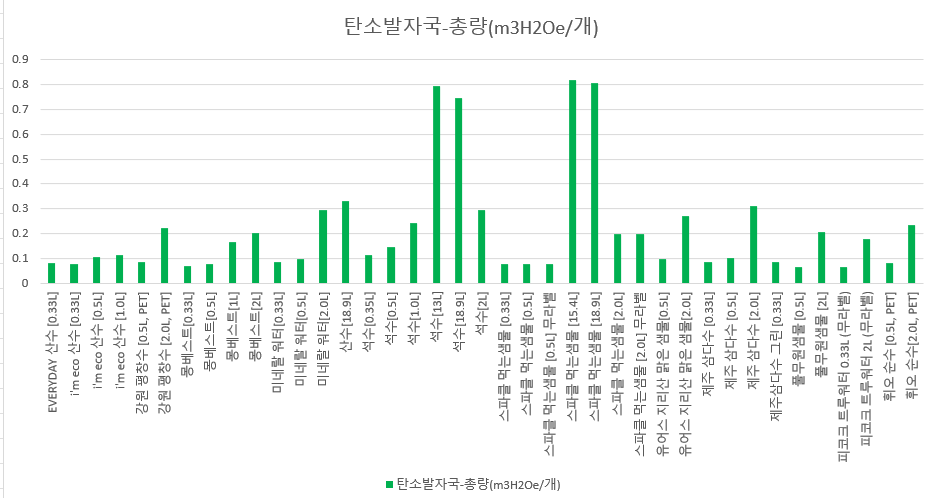

  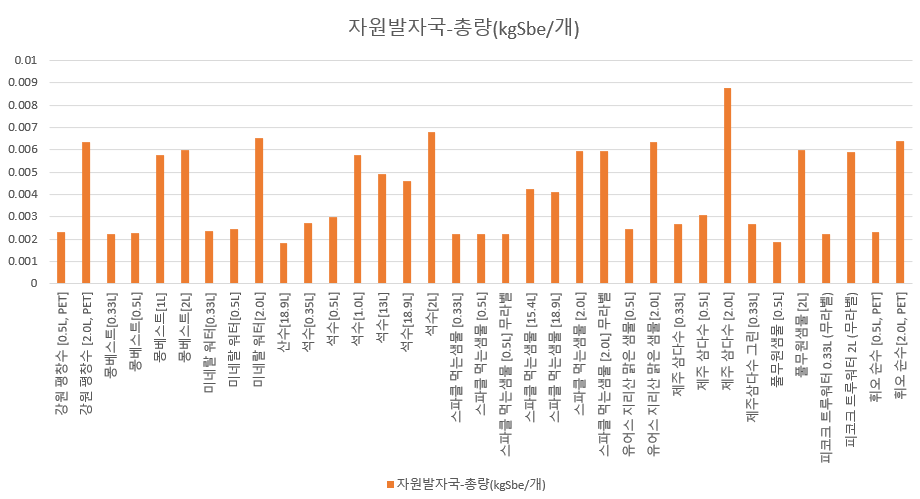

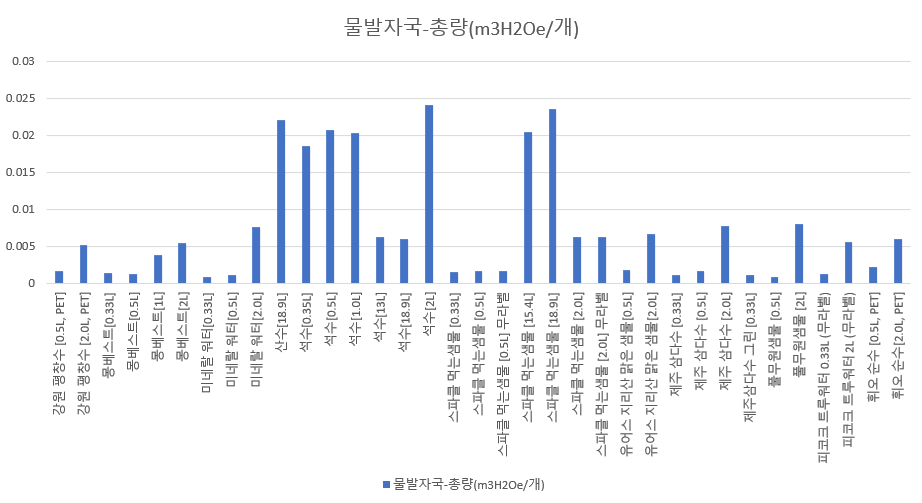

# 중요한 발자국 찾기 - PCA
- correlatoin -matrix, PCA 적용

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


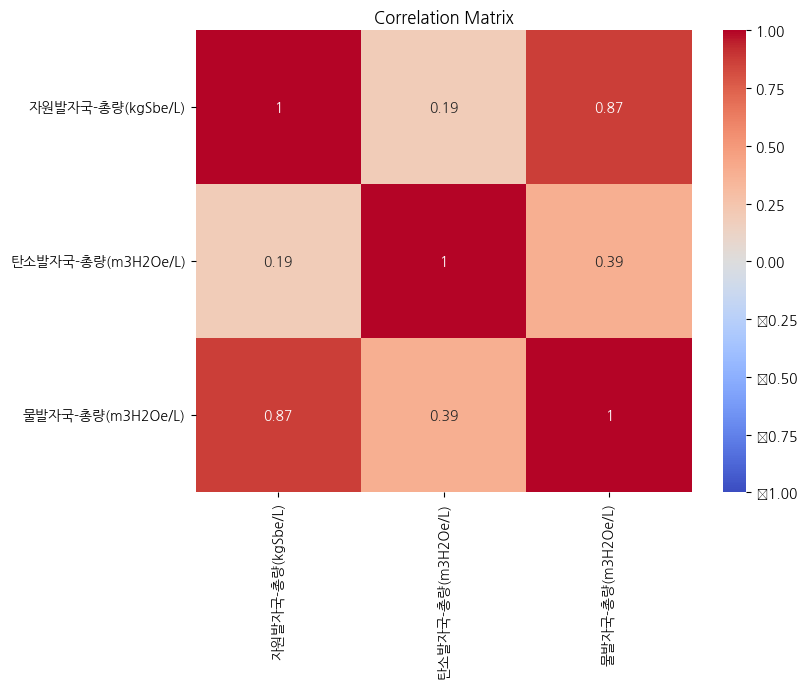

In [67]:
from sklearn.decomposition import PCA

# Define the columns of interest for analysis
columns_of_interest = ['자원발자국-총량(kgSbe/L)', '탄소발자국-총량(m3H2Oe/L)', '물발자국-총량(m3H2Oe/L)']

# Select the relevant data
data_for_analysis = final_dataset[columns_of_interest]

# Step 1: Correlation Matrix
correlation_matrix = data_for_analysis.corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

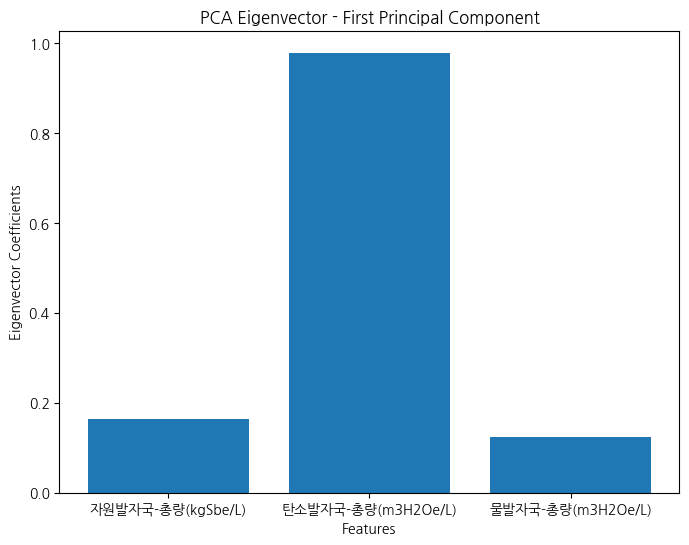

array([0.16425702, 0.97849024, 0.12480574])

In [68]:
# Step 2: PCA Analysis
pca = PCA(n_components=1)  # We are interested in the first principal component
pca.fit(data_for_analysis)

# Retrieve the first principal component (eigenvector)
eigen_vector = pca.components_[0]

# Plot the eigenvector for PCA
plt.figure(figsize=(8, 6))
plt.bar(columns_of_interest, eigen_vector)
plt.title('PCA Eigenvector - First Principal Component')
plt.xlabel('Features')
plt.ylabel('Eigenvector Coefficients')
plt.show()

# Display the eigenvector coefficients for further interpretation
eigen_vector

- 탄소발자국-총량이 가장 높은 값을 가진다.
- 첫 번째 주성분이 데이터의 분산을 설명할 때 탄소발자국이 가장 큰 기여를 한다는 뜻. 따라서 이 지표가 가장 중요한 발자국 지표로 판단될 수 있다.
- 즉, 데이터의 주요 변동 방향에서 탄소발자국이 큰 비중을 차지하고 있으며, 탄소발자국을 줄이는 것이 전체 데이터의 핵심적인 변화 요인이 될 가능성이 있다.

# 데이터로 상품 정렬

In [70]:
# 크롤링으로 물 데이터 목록을 가져옴
crawled_list = ['탐사수 무라벨, 2L, 12개', '탐사수 무라벨, 500ml, 40개', '제주삼다수 그린 무라벨, 2L, 12개',
                    '제주 삼다수, 2L, 12개', '스파클 생수 무라벨, 2L, 24개', '탐사수 무라벨, 2L, 36개',
                    '탐사수 무라벨, 2L, 24개', '탐사 샘물, 2L, 12개', '탐사수 무라벨, 500ml, 60개',
                    '한국청정음로(주) 몽베스트 생수 물 330ml 500ml 1L 2L, 300ml x 20개, 20개', '스파클 생수 무라벨, 500ml, 60개', '풀무원샘물바이네이쳐 무라벨 생수, 2L, 12개']

In [71]:
water_name_list = ['탐사수','탐사수', '제주 삼다수', '제주 삼다수', '스파클 먹는샘물', '탐사수', '탐사수', '탐사 샘물', '탐사수', '몽베스트', '스파클 먹는샘물', '풀무원샘물']

In [75]:
kind_of_water_data = pd.read_csv(data_path + "final_kind_of_water_dataset.csv")

In [76]:
kind_of_water_list = ['탐사수', '삼다수', '스파클', '몽베스트', '풀무원샘물']

In [77]:
print(len(crawled_list))
print(len(water_name_list))

12
12


In [78]:
crawled_data = pd.DataFrame({'원본 이름' : crawled_list, '제품명' : water_name_list})

In [ ]:
crawled_data.head()

,원본 이름,제품명
0,"탐사수 무라벨, 2L, 12개",탐사수
1,"탐사수 무라벨, 500ml, 40개",탐사수
2,"제주삼다수 그린 무라벨, 2L, 12개",제주 삼다수
3,"제주 삼다수, 2L, 12개",제주 삼다수
4,"스파클 생수 무라벨, 2L, 24개",스파클 먹는샘물


In [79]:
# kind_of_water_data.concat({'인증제품명': ['탐사수'], '자원발자국-총량(kgSbe/L)': [kind_of_water_data['자원발자국-총량(kgSbe/L)'].mean()],
#                            '탄소발자국-총량(m3H2Oe/L)': [kind_of_water_data['탄소발자국-총량(m3H2Oe/L)'].mean()],
#                            '물발자국-총량(m3H2Oe/L)': [kind_of_water_data['물발자국-총량(m3H2Oe/L)'].mean()]})

In [82]:
kind_of_water_data

,인증제품명,자원발자국-총량(kgSbe/L),탄소발자국-총량(m3H2Oe/L),물발자국-총량(m3H2Oe/L)
0,EVERYDAY 산수,0.007394,0.248485,0.005000
1,i'm eco 산수,0.140045,0.161674,0.061087
2,강원 평창수,0.003897,0.139400,0.003067
3,몽베스트,0.005027,0.155562,0.003428
4,미네랄 워터,0.005117,0.199122,0.002907
5,산수,0.000098,0.017460,0.001169
6,석수,0.003929,0.183821,0.021227
7,스파클 먹는샘물,0.003150,0.118605,0.002927
8,아이시스8.0,0.003753,0.116650,0.004525
9,아이시스8.0ECO,0.003720,0.103333,0.003800


In [83]:
# kind_of_water_data의 인증제품명이 crawled_data의 제품명에 포함되는지 확인하기 위한 열 생성
kind_of_water_data['merge_key'] = kind_of_water_data['인증제품명'].apply(
    lambda x: next((prod for prod in crawled_data['제품명'] if prod in x), None)
)

# merge_key를 기준으로 left join
merged_df = pd.merge(crawled_data,kind_of_water_data, left_on='제품명', right_on='merge_key' , how='left')


In [84]:
merged_df

,원본 이름,제품명,인증제품명,자원발자국-총량(kgSbe/L),탄소발자국-총량(m3H2Oe/L),물발자국-총량(m3H2Oe/L),merge_key
0,"탐사수 무라벨, 2L, 12개",탐사수,탐사수 무라벨,0.007841,0.232741,0.005415,탐사수
1,"탐사수 무라벨, 500ml, 40개",탐사수,탐사수 무라벨,0.007841,0.232741,0.005415,탐사수
2,"제주삼다수 그린 무라벨, 2L, 12개",제주 삼다수,제주 삼다수,0.006677,0.220159,0.003576,제주 삼다수
3,"제주 삼다수, 2L, 12개",제주 삼다수,제주 삼다수,0.006677,0.220159,0.003576,제주 삼다수
4,"스파클 생수 무라벨, 2L, 24개",스파클 먹는샘물,스파클 먹는샘물,0.003150,0.118605,0.002927,스파클 먹는샘물
5,"탐사수 무라벨, 2L, 36개",탐사수,탐사수 무라벨,0.007841,0.232741,0.005415,탐사수
6,"탐사수 무라벨, 2L, 24개",탐사수,탐사수 무라벨,0.007841,0.232741,0.005415,탐사수
7,"탐사 샘물, 2L, 12개",탐사 샘물,탐사 샘물,0.007722,0.233277,0.005409,탐사 샘물
8,"탐사수 무라벨, 500ml, 60개",탐사수,탐사수 무라벨,0.007841,0.232741,0.005415,탐사수
9,"한국청정음로(주) 몽베스트 생수 물 330ml 500ml 1L 2L, 300ml x...",몽베스트,몽베스트,0.005027,0.155562,0.003428,몽베스트


In [85]:
# 순위 계산
merged_df['자원발자국 순위'] = merged_df['자원발자국-총량(kgSbe/L)'].rank(ascending=True, pct=False, method='min')
merged_df['탄소발자국 순위'] = merged_df['탄소발자국-총량(m3H2Oe/L)'].rank(ascending=True, pct=False, method='min')
merged_df['물발자국 순위'] = merged_df['물발자국-총량(m3H2Oe/L)'].rank(ascending=True, pct=False, method='min')

merged_df

,원본 이름,제품명,인증제품명,자원발자국-총량(kgSbe/L),탄소발자국-총량(m3H2Oe/L),물발자국-총량(m3H2Oe/L),merge_key,자원발자국 순위,탄소발자국 순위,물발자국 순위
0,"탐사수 무라벨, 2L, 12개",탐사수,탐사수 무라벨,0.007841,0.232741,0.005415,탐사수,8.0,7.0,8.0
1,"탐사수 무라벨, 500ml, 40개",탐사수,탐사수 무라벨,0.007841,0.232741,0.005415,탐사수,8.0,7.0,8.0
2,"제주삼다수 그린 무라벨, 2L, 12개",제주 삼다수,제주 삼다수,0.006677,0.220159,0.003576,제주 삼다수,5.0,5.0,5.0
3,"제주 삼다수, 2L, 12개",제주 삼다수,제주 삼다수,0.006677,0.220159,0.003576,제주 삼다수,5.0,5.0,5.0
4,"스파클 생수 무라벨, 2L, 24개",스파클 먹는샘물,스파클 먹는샘물,0.003150,0.118605,0.002927,스파클 먹는샘물,1.0,2.0,2.0
5,"탐사수 무라벨, 2L, 36개",탐사수,탐사수 무라벨,0.007841,0.232741,0.005415,탐사수,8.0,7.0,8.0
6,"탐사수 무라벨, 2L, 24개",탐사수,탐사수 무라벨,0.007841,0.232741,0.005415,탐사수,8.0,7.0,8.0
7,"탐사 샘물, 2L, 12개",탐사 샘물,탐사 샘물,0.007722,0.233277,0.005409,탐사 샘물,7.0,12.0,7.0
8,"탐사수 무라벨, 500ml, 60개",탐사수,탐사수 무라벨,0.007841,0.232741,0.005415,탐사수,8.0,7.0,8.0
9,"한국청정음로(주) 몽베스트 생수 물 330ml 500ml 1L 2L, 300ml x...",몽베스트,몽베스트,0.005027,0.155562,0.003428,몽베스트,4.0,4.0,4.0


In [86]:
# 순위 컬럼들을 int로 변환
merged_df['자원발자국 순위'] = merged_df['자원발자국 순위'].astype(int)
merged_df['탄소발자국 순위'] = merged_df['탄소발자국 순위'].astype(int)
merged_df['물발자국 순위'] = merged_df['물발자국 순위'].astype(int)

# '총순위' 컬럼 추가 (자원발자국 순위 + 탄소발자국 순위 + 물발자국 순위)
merged_df['순위 합'] = merged_df['자원발자국 순위'] + merged_df['탄소발자국 순위'] + merged_df['물발자국 순위']

# '총순위' 기준으로 오름차순 정렬
final_df = merged_df.sort_values(by='순위 합')

In [87]:
# 최대 순위 계산
max_resource =final_df['자원발자국 순위'].max()
max_carbon = final_df['탄소발자국 순위'].max()
max_water = final_df['물발자국 순위'].max()

max_rank = max(max_resource, max_carbon, max_water)

In [88]:
print(max_rank)

12


In [89]:
final_df.reset_index(drop=True, inplace=True)

In [90]:
final_df

,원본 이름,제품명,인증제품명,자원발자국-총량(kgSbe/L),탄소발자국-총량(m3H2Oe/L),물발자국-총량(m3H2Oe/L),merge_key,자원발자국 순위,탄소발자국 순위,물발자국 순위,순위 합
0,"스파클 생수 무라벨, 2L, 24개",스파클 먹는샘물,스파클 먹는샘물,0.003150,0.118605,0.002927,스파클 먹는샘물,1,2,2,5
1,"스파클 생수 무라벨, 500ml, 60개",스파클 먹는샘물,스파클 먹는샘물,0.003150,0.118605,0.002927,스파클 먹는샘물,1,2,2,5
2,"풀무원샘물바이네이쳐 무라벨 생수, 2L, 12개",풀무원샘물,풀무원샘물,0.003380,0.117000,0.002893,풀무원샘물,3,1,1,5
3,"한국청정음로(주) 몽베스트 생수 물 330ml 500ml 1L 2L, 300ml x...",몽베스트,몽베스트,0.005027,0.155562,0.003428,몽베스트,4,4,4,12
4,"제주삼다수 그린 무라벨, 2L, 12개",제주 삼다수,제주 삼다수,0.006677,0.220159,0.003576,제주 삼다수,5,5,5,15
5,"제주 삼다수, 2L, 12개",제주 삼다수,제주 삼다수,0.006677,0.220159,0.003576,제주 삼다수,5,5,5,15
6,"탐사수 무라벨, 2L, 12개",탐사수,탐사수 무라벨,0.007841,0.232741,0.005415,탐사수,8,7,8,23
7,"탐사수 무라벨, 500ml, 40개",탐사수,탐사수 무라벨,0.007841,0.232741,0.005415,탐사수,8,7,8,23
8,"탐사수 무라벨, 2L, 36개",탐사수,탐사수 무라벨,0.007841,0.232741,0.005415,탐사수,8,7,8,23
9,"탐사수 무라벨, 2L, 24개",탐사수,탐사수 무라벨,0.007841,0.232741,0.005415,탐사수,8,7,8,23


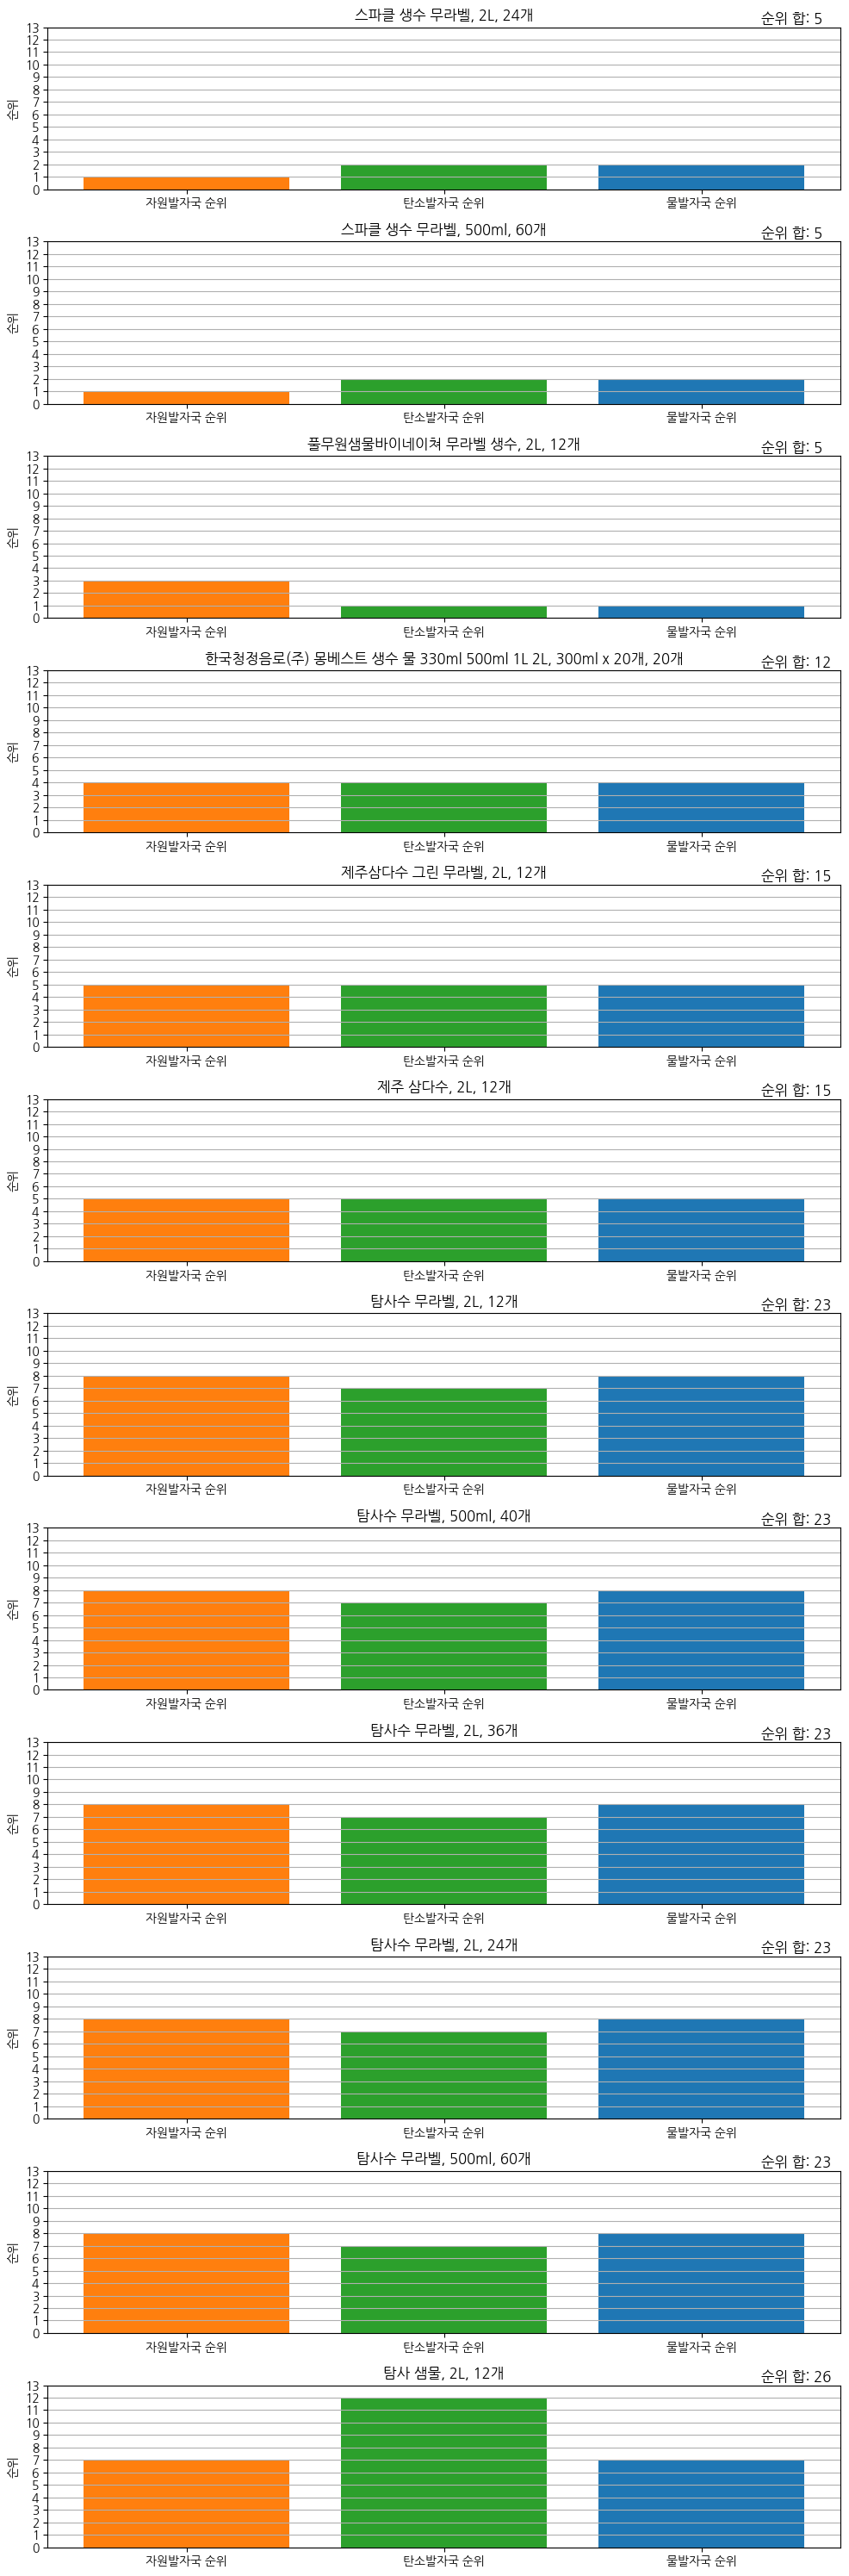

In [91]:
colors = ['tab:orange', 'tab:green', 'tab:blue']  # 자원발자국, 물발자국, 탄소발자국에 대한 색상
# subplot을 그리기 위한 설정
fig, axs = plt.subplots(len(final_df), 1, figsize=(10, 30))

# 각 행별로 subplot 생성
for i, row in final_df.iterrows():
    ax = axs[i] if len(final_df) > 1 else axs
    ax.bar(['자원발자국 순위', '탄소발자국 순위', '물발자국 순위'],
           [row['자원발자국 순위'], row['탄소발자국 순위'], row['물발자국 순위']],
           color=colors)


    # ax.set_title(row['원본 이름']

    ax.set_title(row['원본 이름'], loc='center')  # 제목을 좌측에 설정
    ax.text(0.9, 1.05, f"순위 합: {row['순위 합']}", transform=ax.transAxes, fontsize=12,
            color='black', ha='left', va='center')

    ax.set_ylabel('순위')
    ax.set_ylim(0, int(max_rank)+1)
    ax.set_yticks(range(0, int(max_rank)+2, 1))  # y축 간격을 1로 설정
    ax.grid(True, axis='y')

plt.tight_layout()
plt.show()

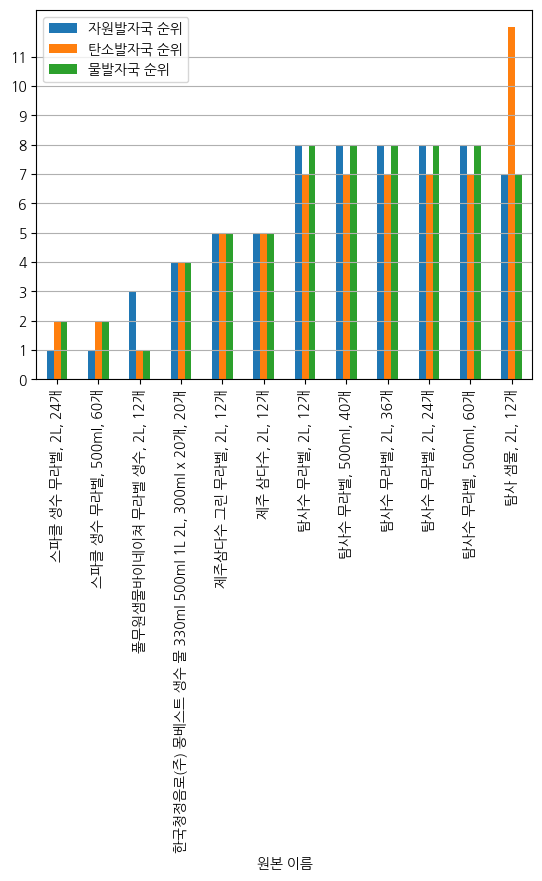

In [92]:
final_df.plot.bar(x='원본 이름',y=['자원발자국 순위','탄소발자국 순위','물발자국 순위'])
plt.yticks(np.arange(0,max_rank,1))
plt.grid(True, axis='y')
plt.show()